### Model Training

In [48]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [49]:
# Read in data
df = pd.read_csv('data/StudentsPerformance.csv')

In [50]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [51]:
X = df.drop(columns=['math score'],axis=1)

In [52]:
y = df['math score']

In [53]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [54]:
X = preprocessor.fit_transform(X)

In [56]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
def evaluate_model(true, predicted):
    """
    Evaluate the performance of a regression model.
    
    Parameters:
    true (array-like): True values.
    predicted (array-like): Predicted values.
    
    Returns:
    dict: A dictionary containing various evaluation metrics.
    """
    metrics = {
        r2_score(true, predicted),
        mean_absolute_error(true, predicted),
        mean_squared_error(true, predicted),
        np.sqrt(mean_squared_error(true, predicted))
    }
    
    return metrics

In [95]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

In [96]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_r2, model_train_mae , model_train_mse, model_train_rmse = evaluate_model(y_train, y_train_pred)

    model_test_r2, model_test_mae , model_test_mse, model_test_rmse = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 28.3652
- Mean Squared Error: 4.2673
- Mean Absolute Error: 5.3259
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.3666
- Mean Squared Error: 4.2247
- Mean Absolute Error: 5.4191
- R2 Score: 0.8793


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Squared Error: 5.2063
- Mean Absolute Error: 43.4784
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Squared Error: 5.1579
- Mean Absolute Error: 42.5064
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 28.3378
- Mean Squared Error: 4.2650
- Mean Absolute Error: 5.3233
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.0563
- Mean Squared Error: 4.2111
- Mean Absolute Error: 5.3904
- R2

### Results

In [97]:
model_list

['Linear Regression',
 'Lasso',
 'Ridge',
 'K-Neighbors Regressor',
 'Decision Tree',
 'Random Forest Regressor',
 'XGBRegressor',
 'CatBoosting Regressor',
 'AdaBoost Regressor']

In [98]:
list(zip(model_list, r2_list))

[('Linear Regression', 0.8793177686146124),
 ('Lasso', 0.8253197323627852),
 ('Ridge', 0.880593148502874),
 ('K-Neighbors Regressor', 0.7838129945787431),
 ('Decision Tree', 0.7281974402724765),
 ('Random Forest Regressor', 0.8503262449050148),
 ('XGBRegressor', 0.8277965653186071),
 ('CatBoosting Regressor', 0.8516318920747058),
 ('AdaBoost Regressor', 0.8463426495123839)]

In [99]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879318
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850326
8,AdaBoost Regressor,0.846343
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.728197


#### Ridge Regression (L2 Regularization)

In [103]:
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.06


### Plot y_pred and y_test

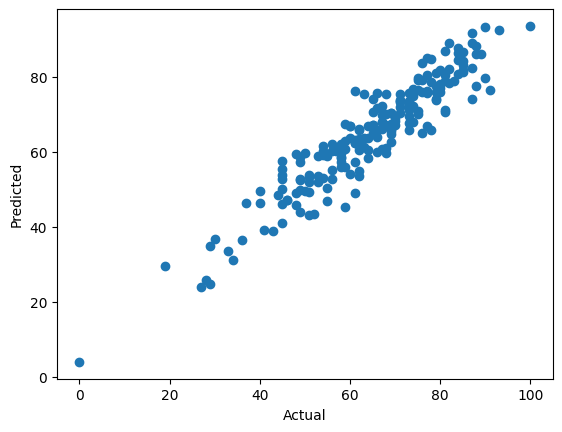

In [104]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

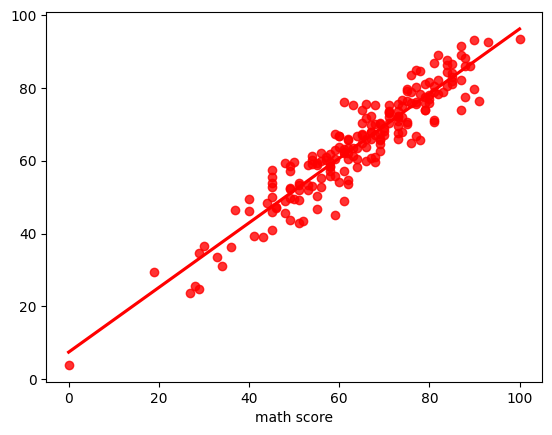

In [105]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [106]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504


Ridge Regression Accuracy: 88.06
Lasso Regression Accuracy: 82.53


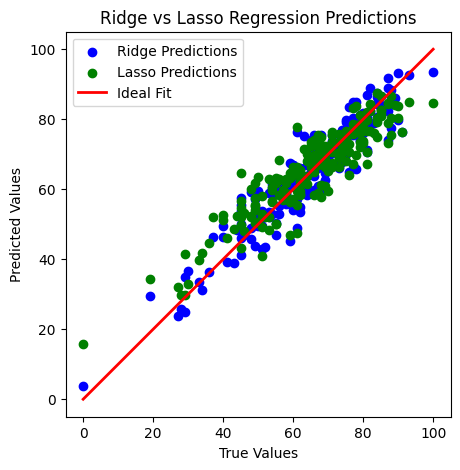

In [108]:
# Training Ridge Regression
ridge_model = Ridge(fit_intercept=True)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_score = r2_score(y_test, y_pred_ridge) * 100
print("Ridge Regression Accuracy: %.2f" % ridge_score)

# Training Lasso Regression
lasso_model = Lasso(fit_intercept=True)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_score = r2_score(y_test, y_pred_lasso) * 100
print("Lasso Regression Accuracy: %.2f" % lasso_score)

# Plotting the results
plt.figure(figsize=(10, 5))

# Plot Ridge Regression results
plt.scatter(y_test, y_pred_ridge, color='blue', label='Ridge Predictions')
plt.scatter(y_test, y_pred_lasso, color='green', label='Lasso Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Fit')

# Ensure equal scaling for both axes
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Ridge vs Lasso Regression Predictions')
plt.legend()
plt.show()